In [1]:
# libraries
import sys
sys.path.append("../../models")
from functions import import_country
import pandas as pd 
import numpy as np 
import os 
import pickle as pkl
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib.patches as patches
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import to_rgba
from matplotlib import colors as clrs
import matplotlib.lines as lines
from matplotlib.ticker import FormatStrFormatter

plt.rcParams['axes.linewidth'] = 0.3
plt.rcParams['xtick.major.width'] = 0.3
plt.rcParams['ytick.major.width'] = 0.3
plt.rcParams['xtick.major.size'] = 3
plt.rcParams['ytick.major.size'] = 3
plt.rcParams['xtick.minor.width'] = 0.2
plt.rcParams['ytick.minor.width'] = 0.2
plt.rcParams['xtick.minor.size'] = 1.5
plt.rcParams['ytick.minor.size'] = 1.5

font_dirs = ['../fonts/Bai_Jamjuree/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)
plt.rcParams['font.family'] = 'Bai Jamjuree'
plt.rcParams['font.sans-serif'] = 'Bai Jamjuree'

colors = ['#6CC2BD', '#5A809E', '#7C79A2', '#F57D7C', '#FFC1A6', '#FEE4C4']
markers = ["o", "s", "^", "*", "P", "d"]
props = dict(facecolor='grey', alpha=0.1, linewidth=0.3)

import warnings
warnings.filterwarnings("ignore")

alpha_s    = [0, 0.1, 1, 10, 100]
countries  = ["Italy", "Canada", "Serbia", "Ukraine", "Egypt", "Peru"]
VEs        = [0.5, 0.7, 0.9]
vaccination_strategies = ["old_first", "homogeneous", "20-49_first"]

# import data 
with open("../../output/vaccine_efficacy.pkl", "rb") as file: 
    data = pkl.load(file)  

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.


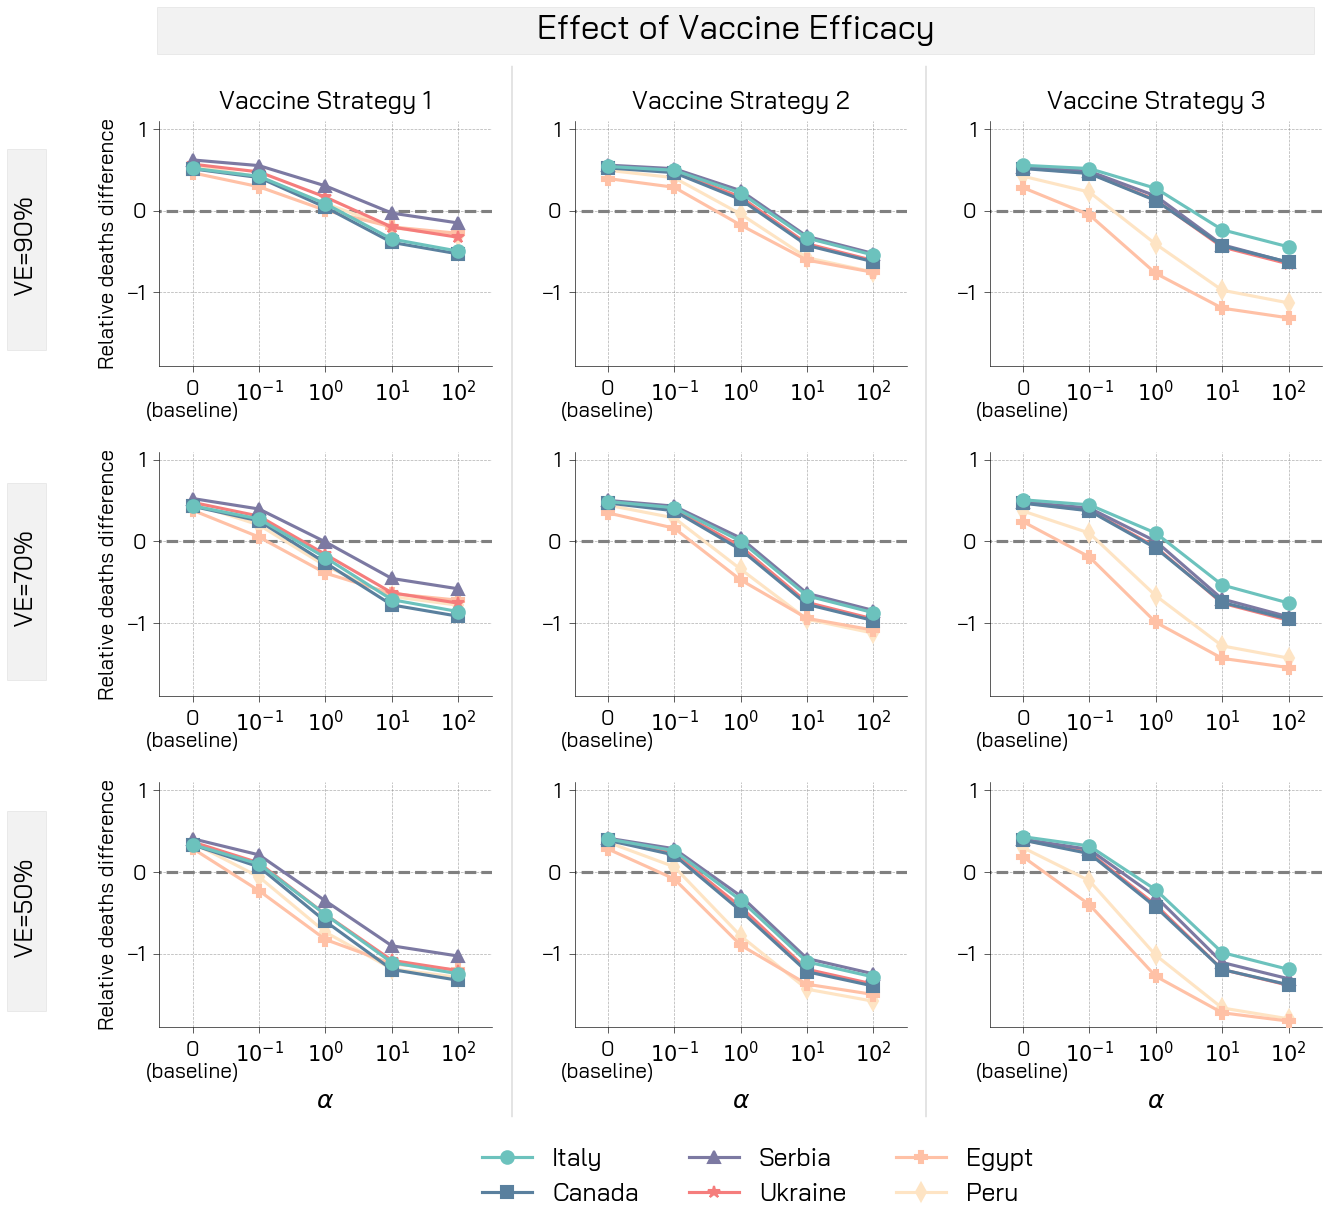

In [2]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,8), dpi=150)
plt.subplots_adjust(hspace=0.6)

rV = 1.0 / 100

for i in range(len(countries)): 
    
    country = countries[i]
    
    axes[0, 2].plot(range(len(alpha_s)), data[country][0.7]["20-49_first"], color=colors[i], marker=markers[i], zorder=int(50 * 1 / (i + 1)))
    axes[0, 1].plot(range(len(alpha_s)), data[country][0.7]["homogeneous"], color=colors[i], marker=markers[i], zorder=int(50 * 1 / (i + 1)))
    axes[0, 0].plot(range(len(alpha_s)), data[country][0.7]["old_first"], color=colors[i], marker=markers[i], zorder=int(50 * 1 / (i + 1)))
    
    axes[1, 2].plot(range(len(alpha_s)), data[country][0.5]["20-49_first"], color=colors[i], marker=markers[i], zorder=int(50 * 1 / (i + 1)))
    axes[1, 1].plot(range(len(alpha_s)), data[country][0.5]["homogeneous"], color=colors[i], marker=markers[i], zorder=int(50 * 1 / (i + 1)))
    axes[1, 0].plot(range(len(alpha_s)), data[country][0.5]["old_first"], color=colors[i], marker=markers[i], zorder=int(50 * 1 / (i + 1)))
    
    axes[2, 2].plot(range(len(alpha_s)), data[country][0.3]["20-49_first"], color=colors[i], marker=markers[i], label=country, zorder=int(50 * 1 / (i + 1)))
    axes[2, 1].plot(range(len(alpha_s)), data[country][0.3]["homogeneous"], color=colors[i], marker=markers[i], zorder=int(50 * 1 / (i + 1)))
    axes[2, 0].plot(range(len(alpha_s)), data[country][0.3]["old_first"], color=colors[i], marker=markers[i], label=country, zorder=int(50 * 1 / (i + 1)))
    

axes[0, 0].set_title("Vaccine Strategy 1")
axes[0, 1].set_title("Vaccine Strategy 2")
axes[0, 2].set_title("Vaccine Strategy 3")

for ax in axes.ravel():
    ax.grid(color='grey', linestyle='--', linewidth=0.35, alpha=0.6, axis="both")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.hlines(0, -0.9, 4.5, linestyle="--", color="gray")
    ax.set_xlim(-0.5, 4.5)
    ax.set_ylim(-1.9, 1.1)
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_xticklabels(["0\n(baseline)","$10^{-1}$", "$10^0$", "$10^1$", "$10^2$"], rotation=0, fontsize=10)
    
for ax in [axes[0,0], axes[1,0], axes[2,0]]:
    ax.set_ylabel("Relative deaths difference")
    
for ax in [axes[2,0], axes[2,1], axes[2,2]]:
    ax.set_xlabel("$\\alpha$", fontsize=12)
    
axes[2, 2].legend(ncol=3, bbox_to_anchor=[0.2,-0.4,0,0], fontsize=12, frameon=False)
axes[0, 0].annotate("       VE=" + str(90) + "%      ", xy=(-0.4,0.1), xycoords='axes fraction', bbox=props, rotation=90, fontsize=12, va='bottom', ha='center')
axes[1, 0].annotate("       VE=" + str(70) + "%      ", xy=(-0.4,0.1), xycoords='axes fraction', bbox=props, rotation=90, fontsize=12, va='bottom', ha='center')
axes[2, 0].annotate("       VE=" + str(50) + "%      ", xy=(-0.4,0.1), xycoords='axes fraction', bbox=props, rotation=90, fontsize=12, va='bottom', ha='center')
axes[0, 0].annotate("                                           Effect of Vaccine Efficacy                                           ", 
                    xy=(3.45, 1.37), xycoords='axes fraction', bbox=props, rotation=0, fontsize=16, va='center', ha='right')

fig.add_artist(lines.Line2D([0.36,0.36], [0.05, 0.926], color="gray", linewidth=0.2))
fig.add_artist(lines.Line2D([0.636,0.636], [0.05, 0.926], color="gray", linewidth=0.2))
plt.subplots_adjust(hspace=0.35, wspace=0.25)

plt.savefig("./SM_img/vaccine_efficacy.pdf", bbox_inches="tight")